In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [2]:
#analyse and visualize data
# Let’s see how many of each class is in our data set
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

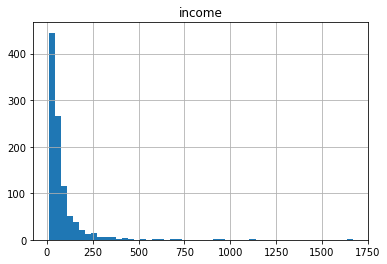

In [5]:
# visualize income using histogram

df.hist(column='income', bins=50)

In [6]:
#feature set

# define feature set x
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values 
X[0:5]

# the label
y = df[['custcat']].values
y[0:5]



array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

In [ ]:
# normalize the data 
#standardize
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [14]:
#train

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 ,random_state=4)
print('train:', X_train.shape, y_train.shape)
print('test:' ,X_test.shape, y_test.shape)

train: (800, 11) (800, 1)
test: (200, 11) (200, 1)


<ipython-input-27-373f6b8a2f1c>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  nb = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
<ipython-input-27-373f6b8a2f1c>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  nb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
<ipython-input-27-373f6b8a2f1c>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  nb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
<ipython-input-27-373f6b8a2f1c>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  nb = KNeighborsClassifier(n_nei

train accuracy: 0.55625
test accuracy: 0.26


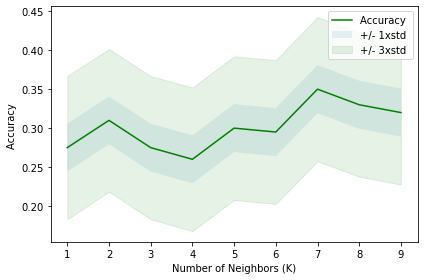

The best accuracy was with 0.35 with k= 7


In [27]:
# classifiction

#K NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier

# start with k = 4

k = 4
nb = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
nb

y_ = nb.predict(X_test)
y_[0:5]


# accuracy evaluation

from sklearn import metrics

print('train accuracy:', metrics.accuracy_score(y_train, nb.predict(X_train)))
print('test accuracy:', metrics.accuracy_score(y_test, y_))



# what about other Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    nb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_=nb.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_)

    
    std_acc[n-1]=np.std(y_==y_test)/np.sqrt(y_.shape[0])

mean_acc

# plot diff acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [23]:
# what about other Ks

 

<ipython-input-23-629a919f2dd0>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)


NameError: name 'nb' is not defined

NameError: name 'X' is not defined